## Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

## Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

## The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# Import Library

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Data preparation and Data Cleaning

In [281]:
df=pd.read_csv('test.csv',delimiter=';')

In [282]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Detailed Column Descriptions:
#### 1 - age (numeric)
#### 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
#### 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#### 4 - education (categorical: "unknown","secondary","primary","tertiary")
#### 5 - default: has credit in default? (binary: "yes","no")
#### 6 - balance: average yearly balance, in euros (numeric)
#### 7 - housing: has housing loan? (binary: "yes","no")
#### 8 - loan: has personal loan? (binary: "yes","no")
### Related with the last contact of the current campaign:
#### 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
#### 10 - day: last contact day of the month (numeric)
#### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#### 12 - duration: last contact duration, in seconds (numeric)
### Other attributes:
#### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
#### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
### Output variable (desired target):
#### 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [283]:
df.shape

(4521, 17)

In [363]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

#### We can see that the label 'y' is imbalance

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [284]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There is no missing value. However, we can see that there are some columns with value 'unknown'

In [285]:
df=pd.read_csv('test.csv',delimiter=';',na_values='unknown')

In [286]:
df.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [287]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


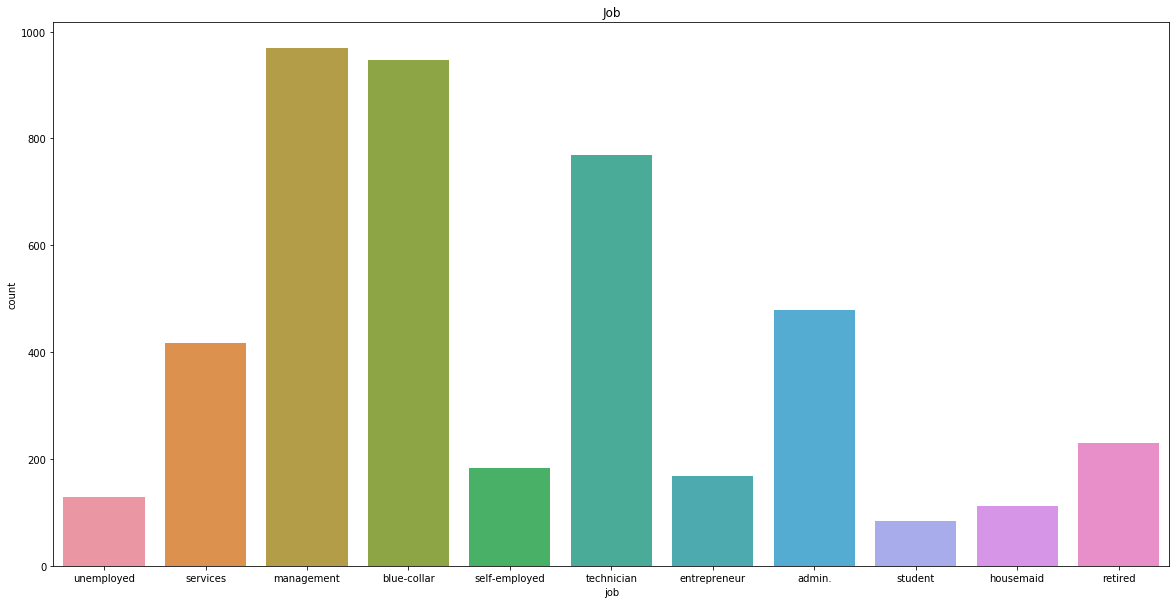

In [288]:
plt.figure(figsize=(20,10))
plt.title('Job')
sns.countplot(df['job'])

#### Most of banking's customer is Management and blue-collar.

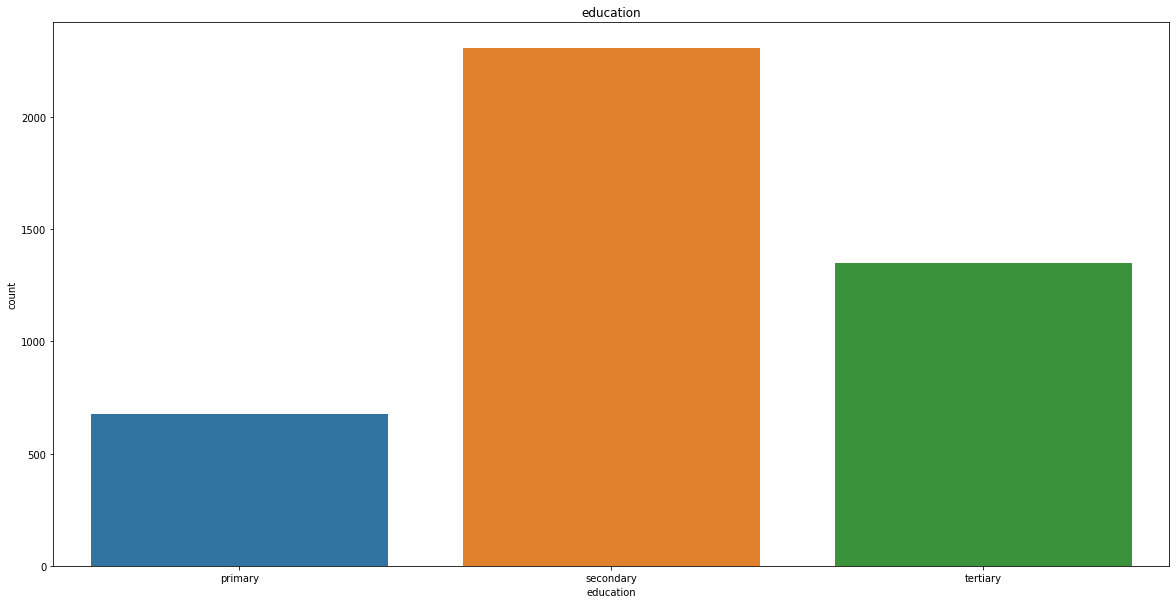

In [289]:
plt.figure(figsize=(20,10))
plt.title('education')
sns.countplot(df['education'])

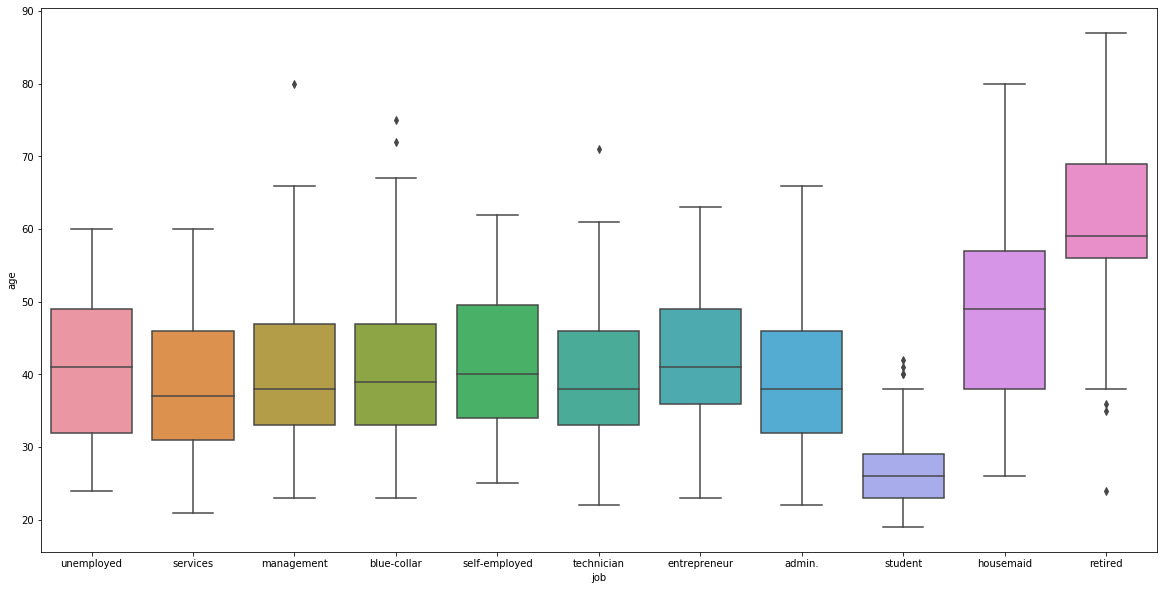

In [290]:
plt.figure(figsize=(20,10))
sns.boxplot(x='job', y='age',data=df)

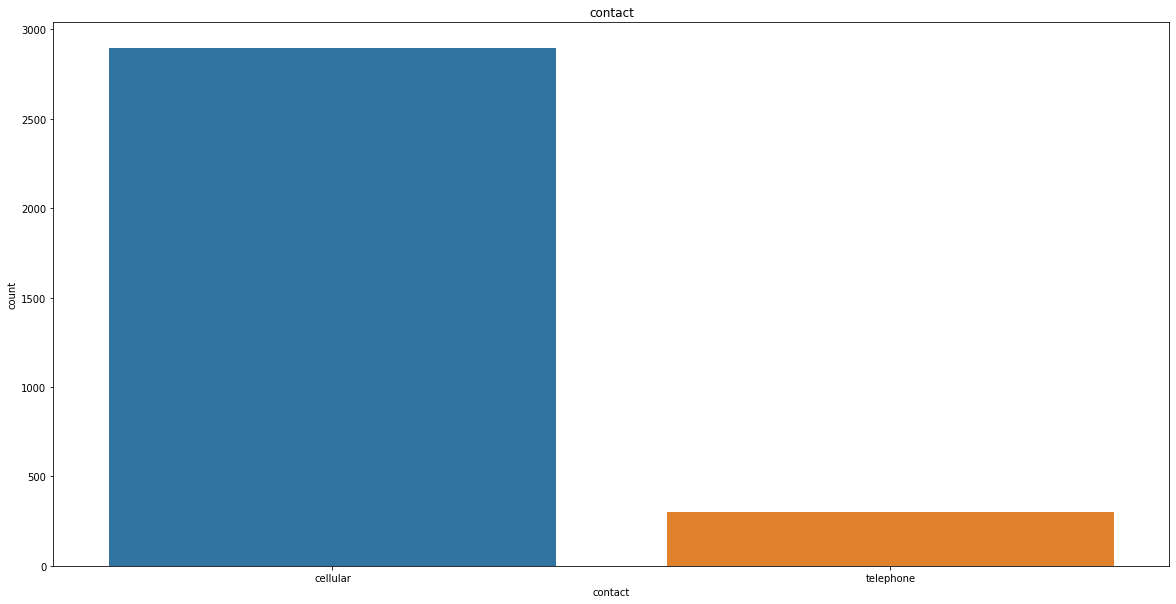

In [291]:
plt.figure(figsize=(20,10))
plt.title('contact')
sns.countplot(df['contact'])

#### The bank use celluar 10 time more than telephone

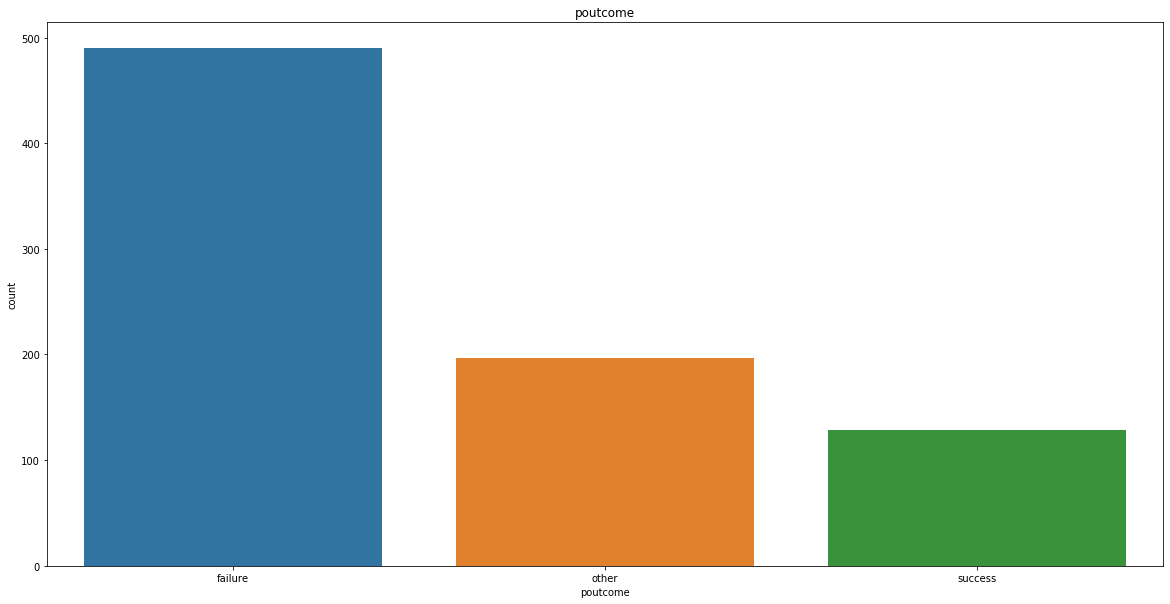

In [292]:
plt.figure(figsize=(20,10))
plt.title('poutcome')
sns.countplot(df['poutcome'])

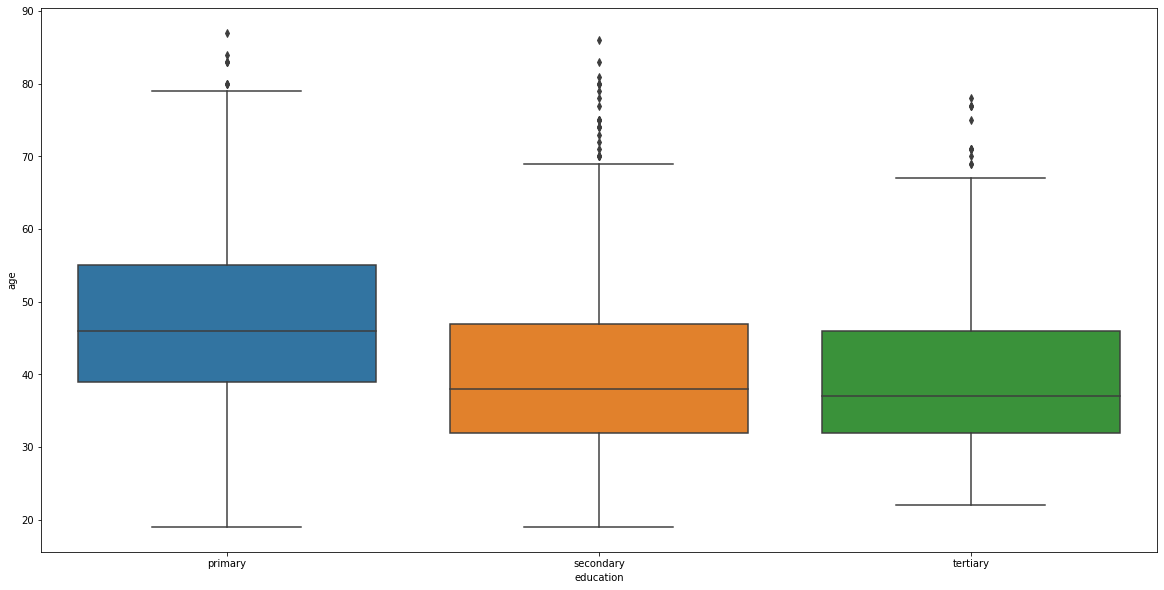

In [293]:
plt.figure(figsize=(20,10))
sns.boxplot(x='education', y='age',data=df)

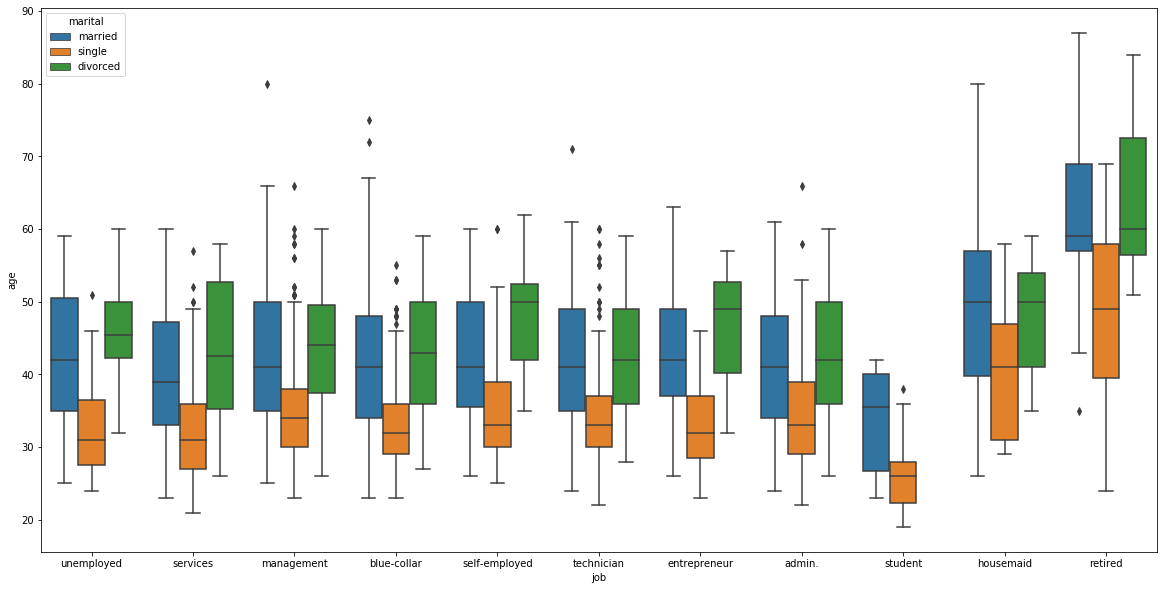

In [294]:
plt.figure(figsize=(20,10))
sns.boxplot(x='job', y='age',hue='marital',data=df)

In [537]:
## Fill Missing Value 

## Fill Missing Job
df.loc[(df.job.isnull()==True) & (df.age<=30),'job']='student'
df.loc[(df.job.isnull()==True) & (df.age>60),'job']='retired'
df.loc[df.job.isnull()==True,'job']='management'

## Fill Education Job
df.loc[(df.education.isnull()==True) & (df.age>48),'education']='primary'
df.loc[df.education.isnull()==True,'education']='secondary'

## Fill contact Job
df.loc[df.contact.isnull()==True,'contact']='cellular'

## Fill poutcome Job
df.loc[df.poutcome.isnull()==True,'poutcome']='failure'

df.isnull().sum()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Actual_Date,p_day_Group,ct
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,failure,no,oct19,0. No Call Before,1
1,33,services,married,secondary,no,2000,yes,yes,cellular,11,may,220,1,339,4,failure,no,may11,4. Call more than 6 Months,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,apr16,4. Call more than 6 Months,1
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,failure,no,jun3,0. No Call Before,1
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no,may5,0. No Call Before,1


# Feature Engineering

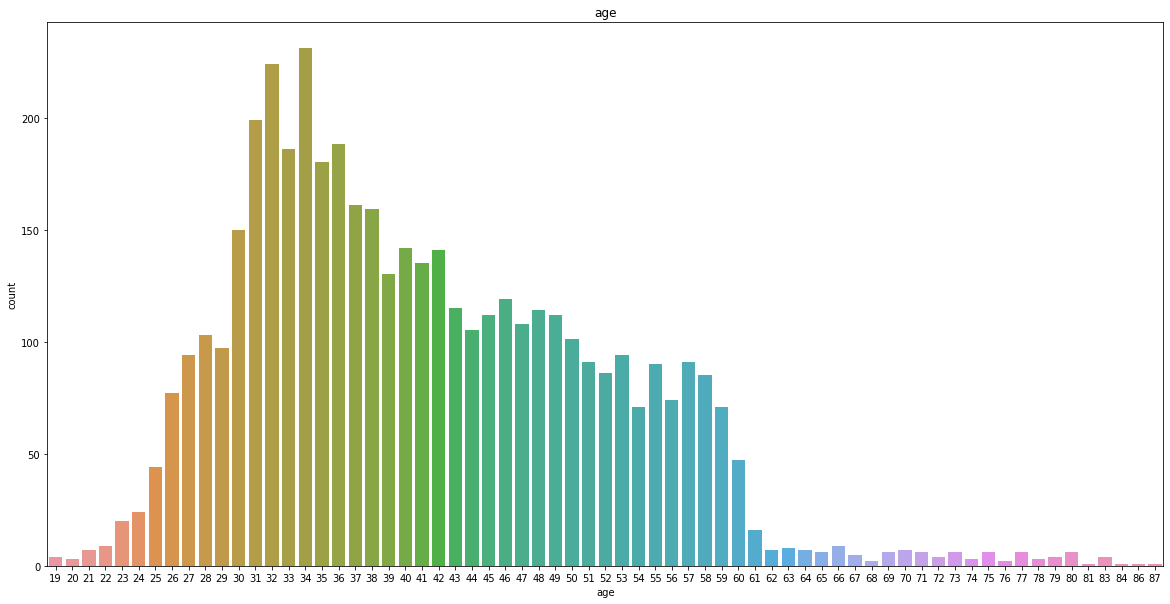

In [296]:
plt.figure(figsize=(20,10))
plt.title('age')
sns.countplot(df['age'])

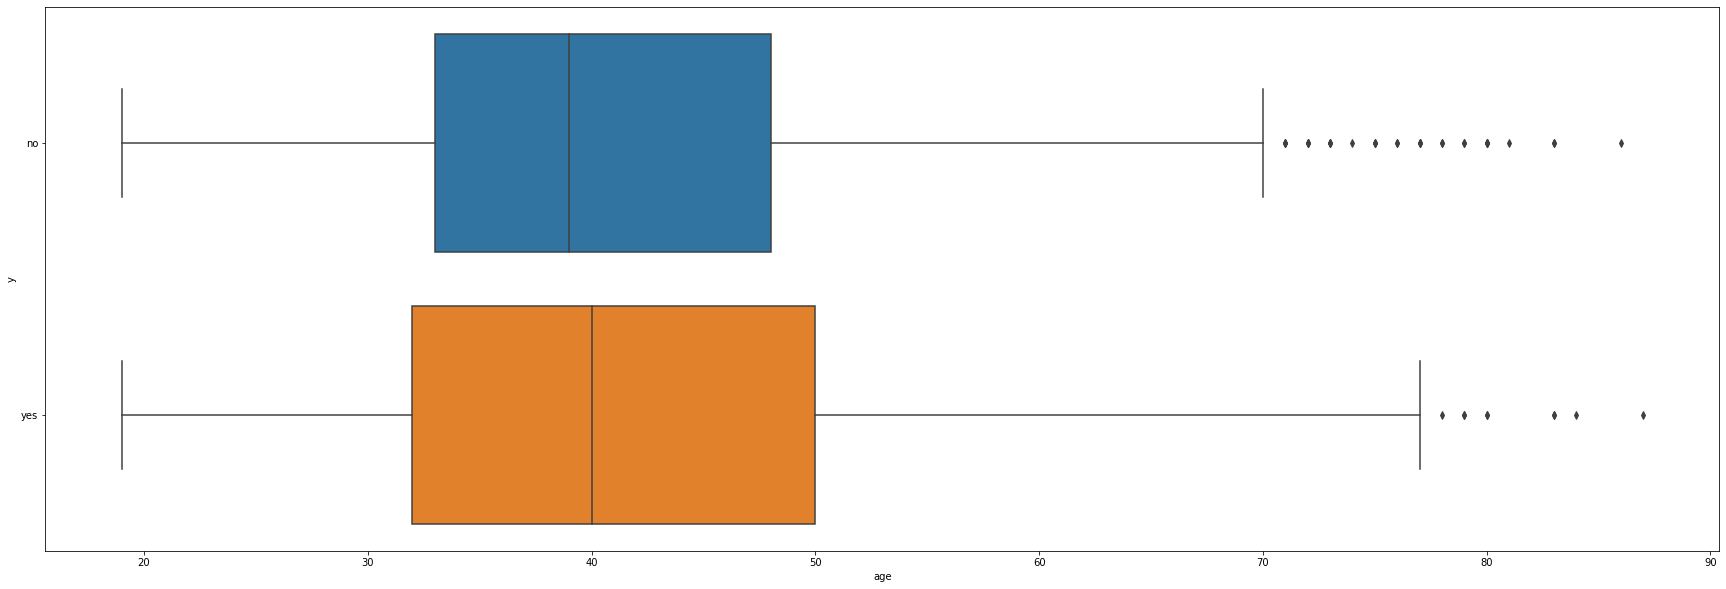

In [304]:
## Check duration and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='age',y='y',data=df)

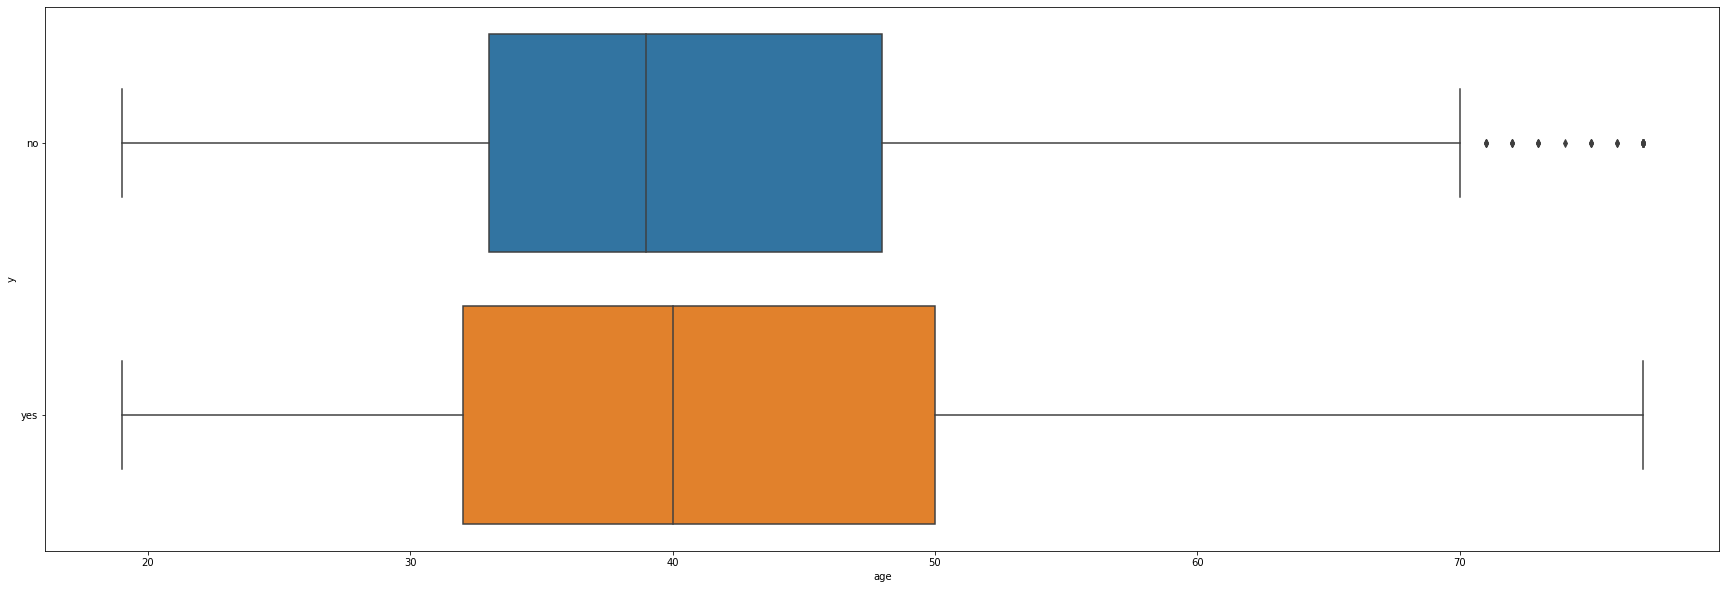

In [307]:
## Make all age Outlier as 77
df.loc[df.age>77,'age']=77

plt.figure(figsize=(30,10))
sns.boxplot(x='age',y='y',data=df)


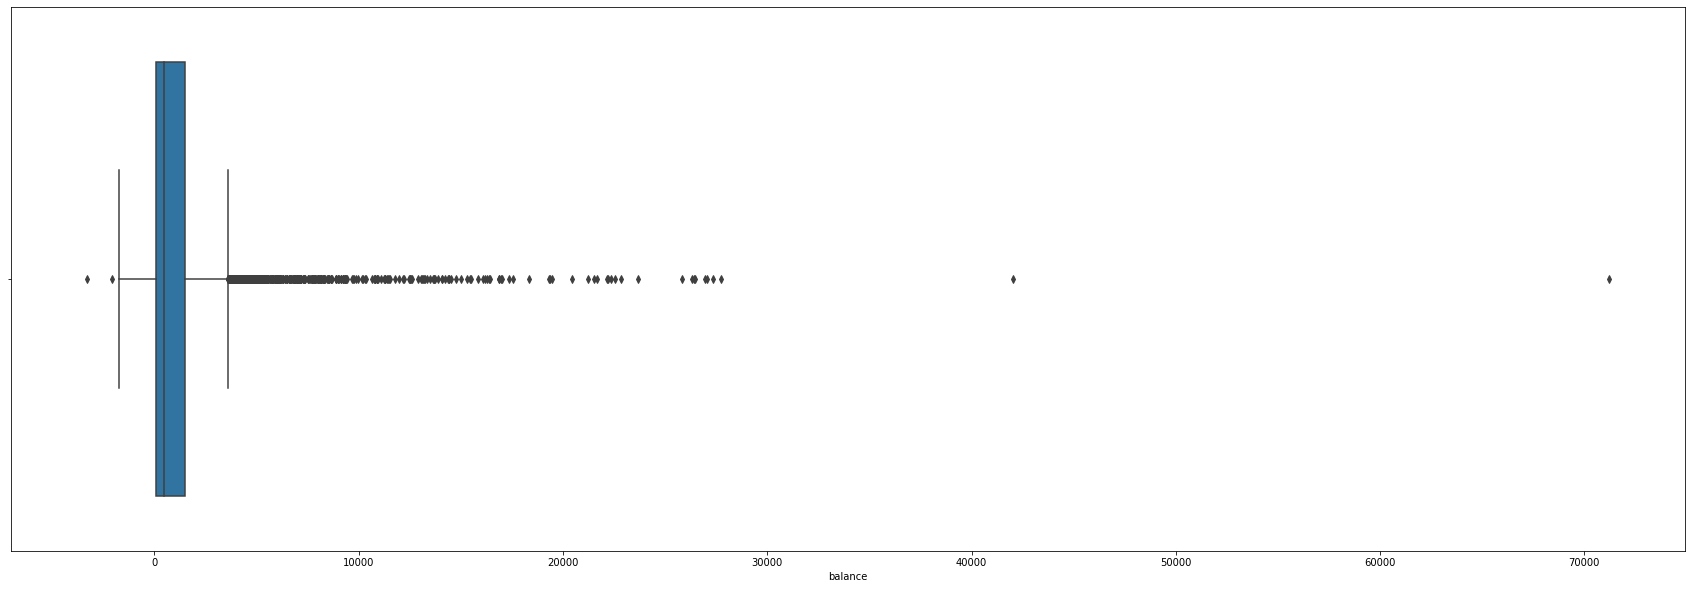

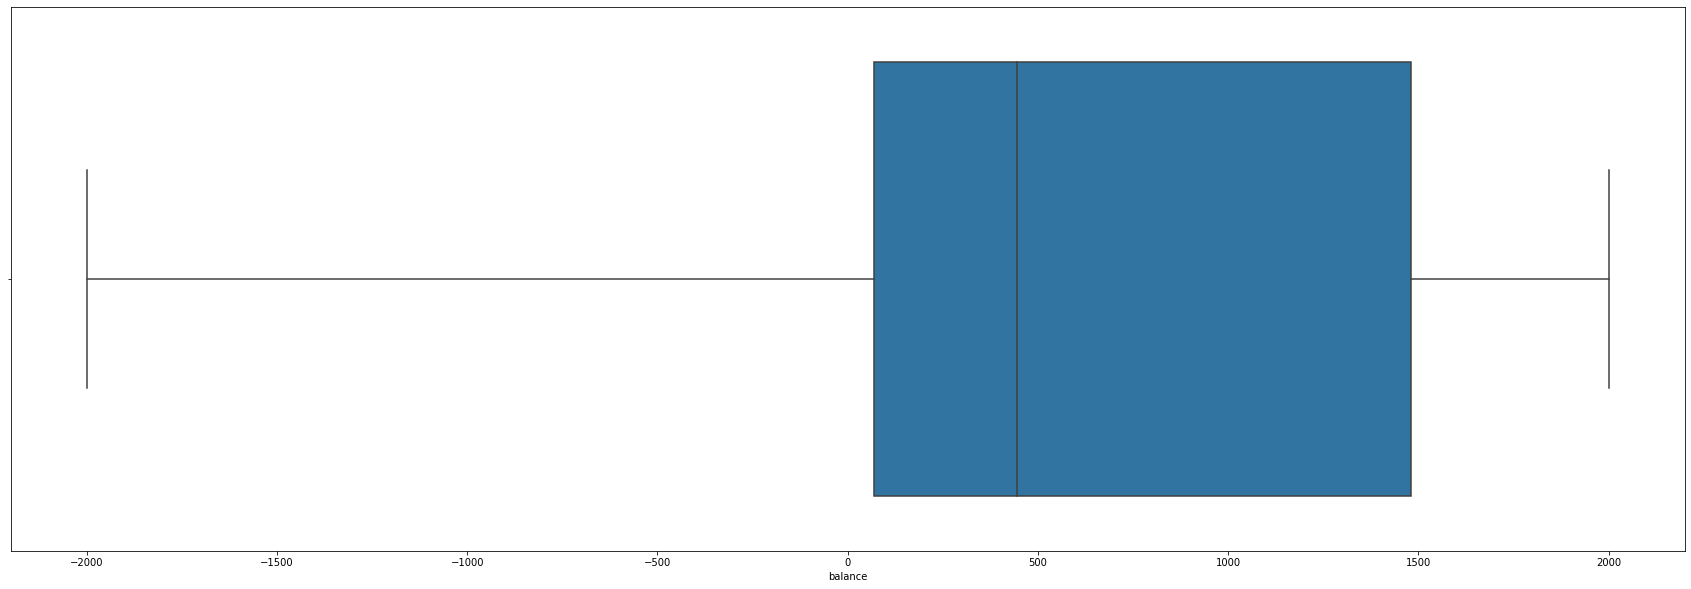

In [297]:
## Check Balance and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='balance',data=df)

## Make all Balance Outlier as 10000
df.loc[df.balance>2000,'balance']=2000
df.loc[df.balance<-2000,'balance']=-2000

plt.figure(figsize=(30,10))
sns.boxplot(x='balance',data=df)

#df.loc[(df.balance>0) & (df.balance<=500),'Balance Group']='2 <=500'
#df.loc[(df.balance>500) & (df.balance<=1500),'Balance Group']='3 500--1500'
#df.loc[(df.balance>1500) & (df.balance<=10000),'Balance Group']='4 >1500'
#df.loc[(df.balance>10000),'Balance Group']='5 >70000'



#plt.figure(figsize=(30,10))
#plt.title('balance')
#sns.countplot(df['Balance Group'])


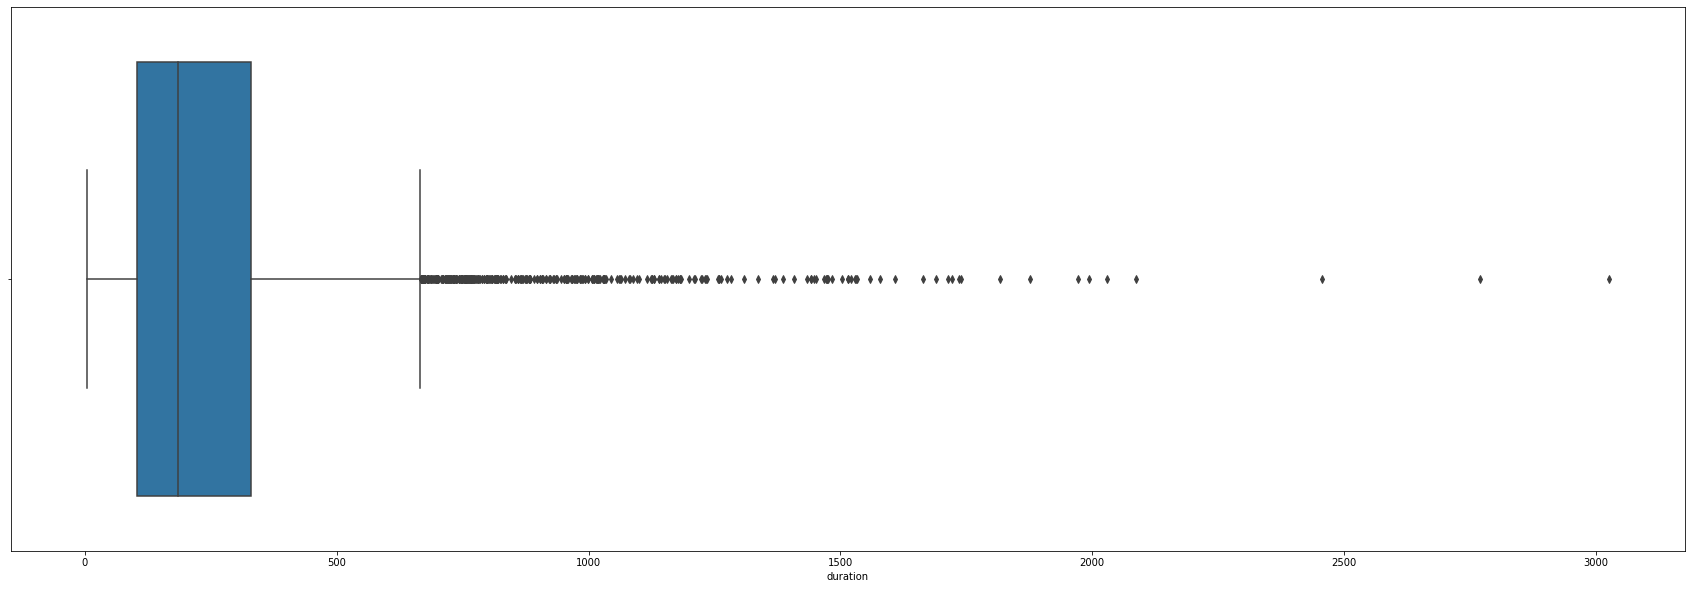

In [298]:
## Check duration and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='duration',data=df)

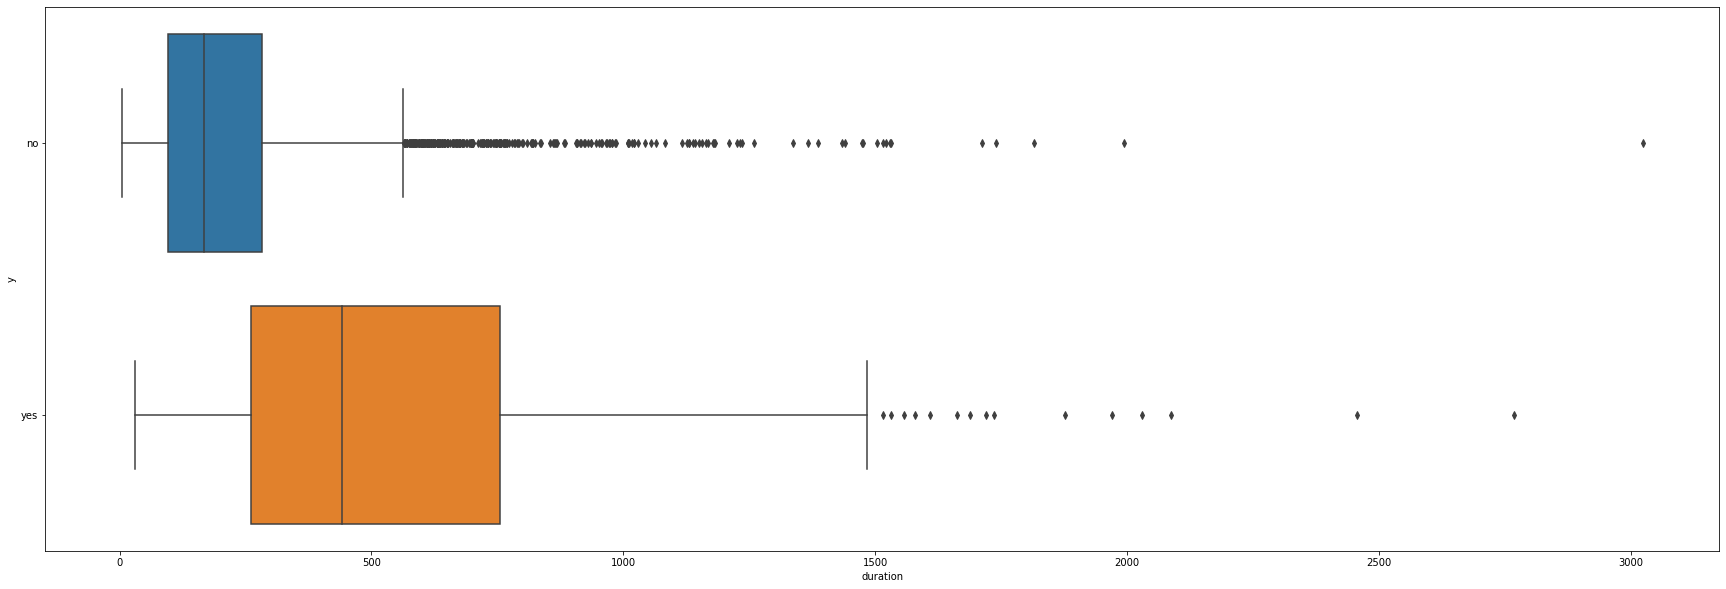

In [299]:
## Check duration and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='duration',y='y',data=df)

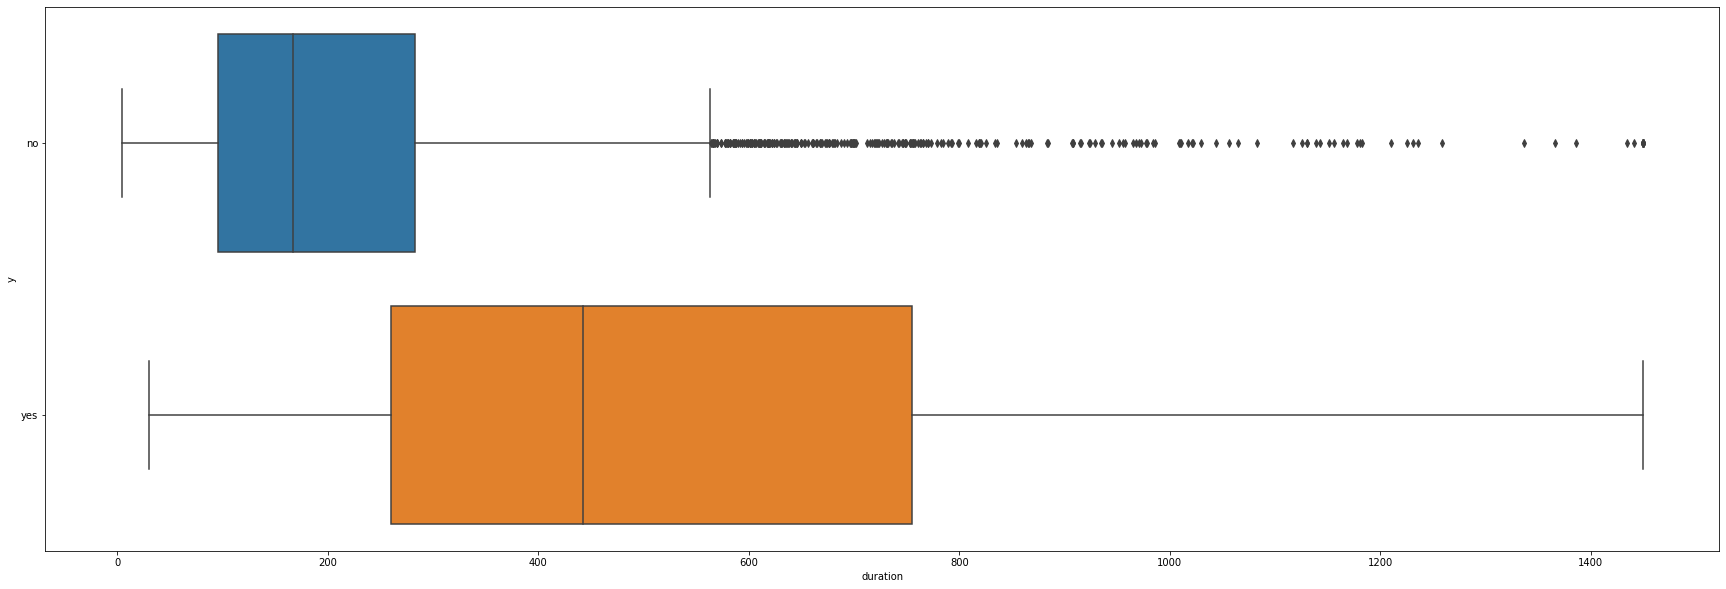

In [301]:
## Make all duration Outlier as 1450
df.loc[df.duration>1450,'duration']=1450

plt.figure(figsize=(30,10))
sns.boxplot(x='duration',y='y',data=df)

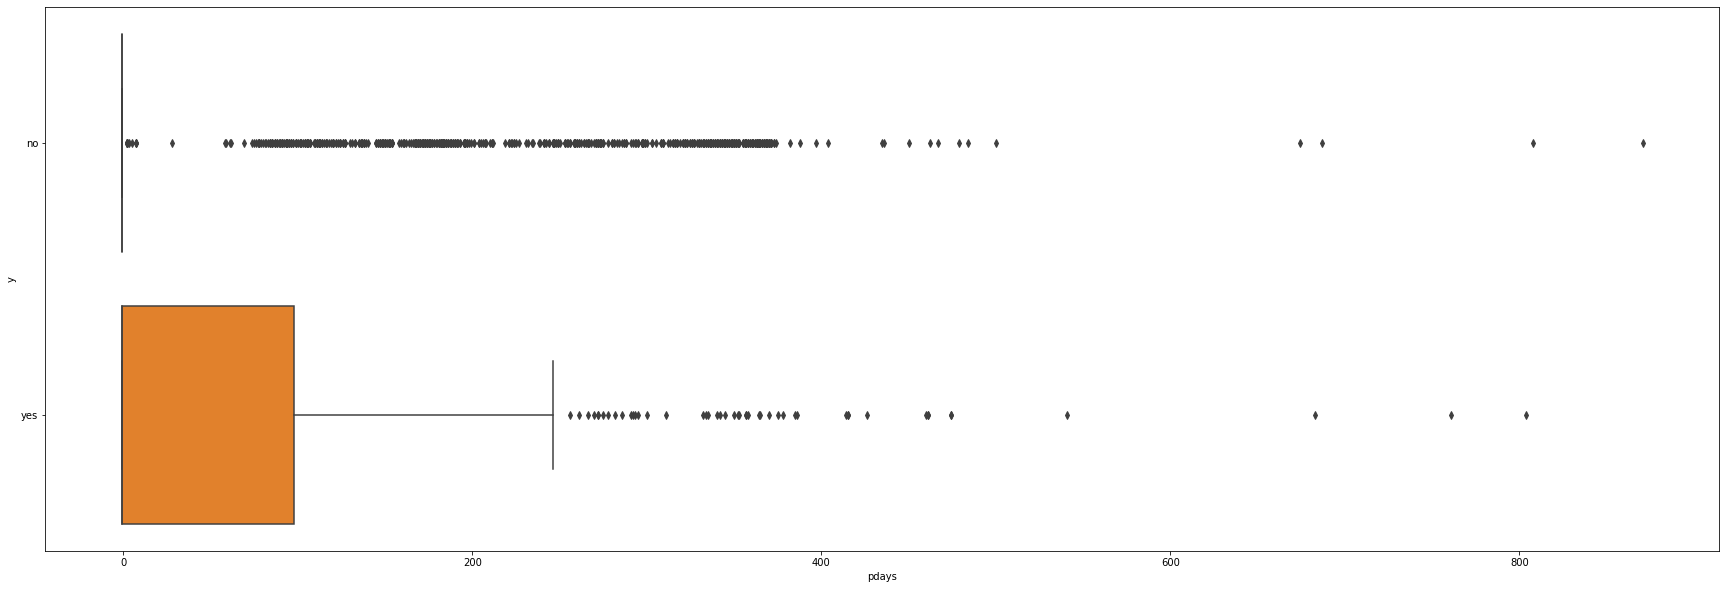

In [322]:
plt.figure(figsize=(30,10))
sns.boxplot(x='pdays',y='y',data=df)

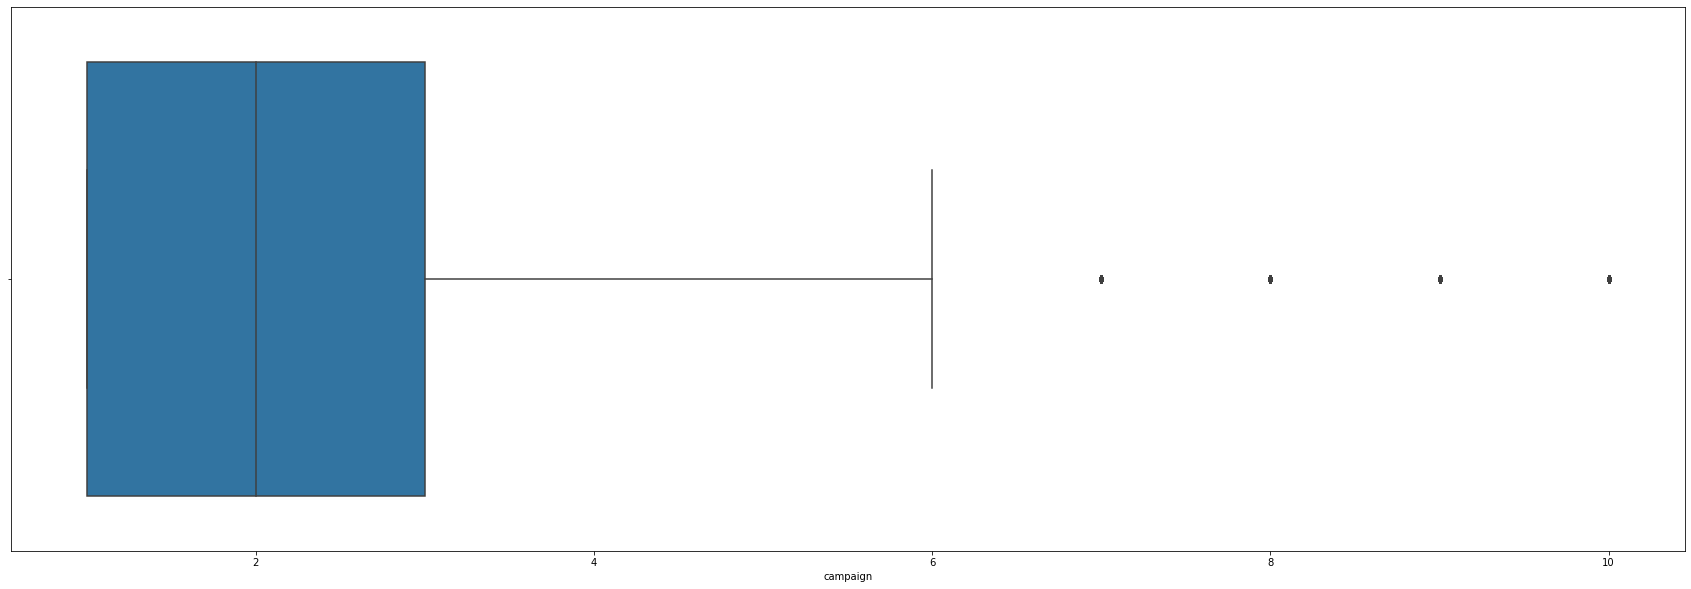

In [330]:
plt.figure(figsize=(30,10))
sns.boxplot(x='campaign',data=df)

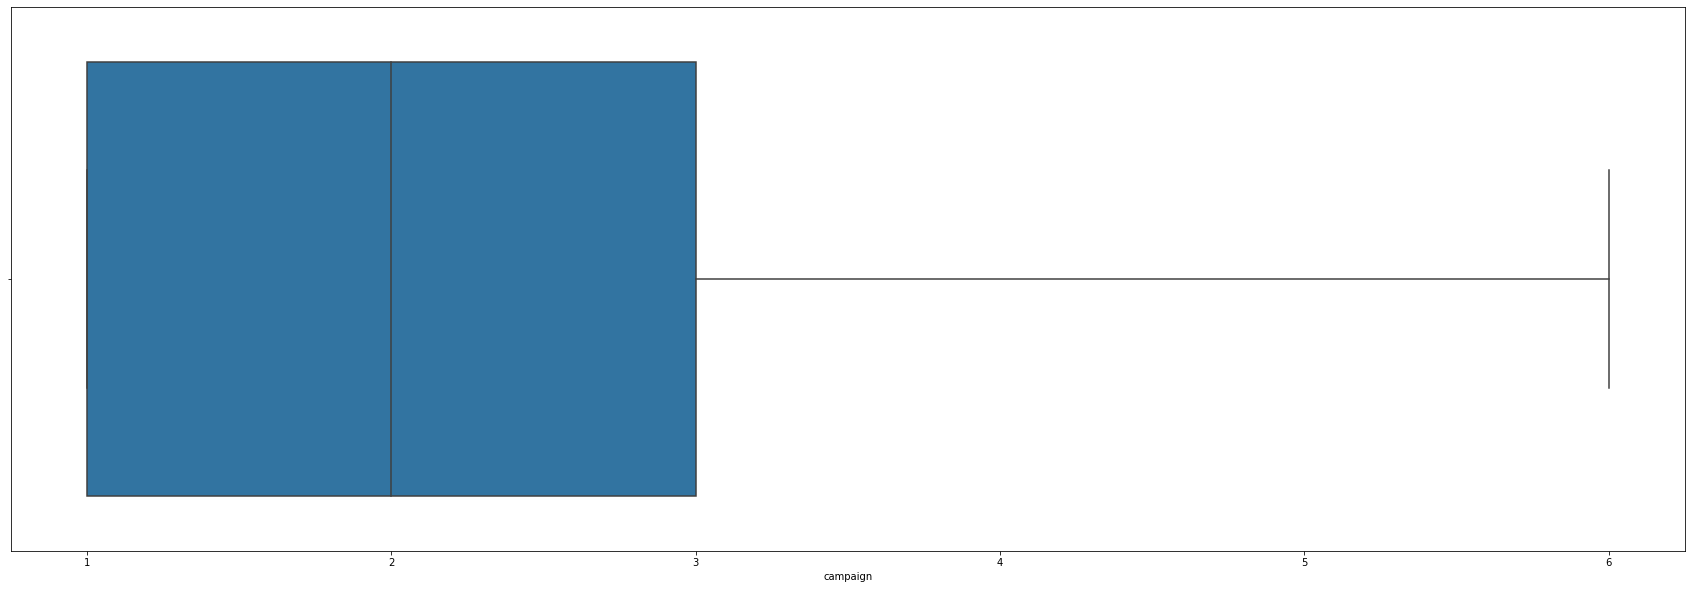

In [332]:
df.loc[(df.campaign>6),'campaign']=6

plt.figure(figsize=(30,10))
sns.boxplot(x='campaign',data=df)

In [324]:
df.loc[df.pdays<=0,'p_day_Group']='0. No Call Before'
df.loc[(df.pdays>0)   & (df.pdays<=60),'p_day_Group']='1. Call within 2 Months'
df.loc[(df.pdays>60)  & (df.pdays<=120),'p_day_Group']='2. Call within 2-4 Months'
df.loc[(df.pdays>120)  & (df.pdays<=180),'p_day_Group']='3. Call within 4-6 Months'
df.loc[(df.pdays>180),'p_day_Group']='4. Call more than 6 Months'

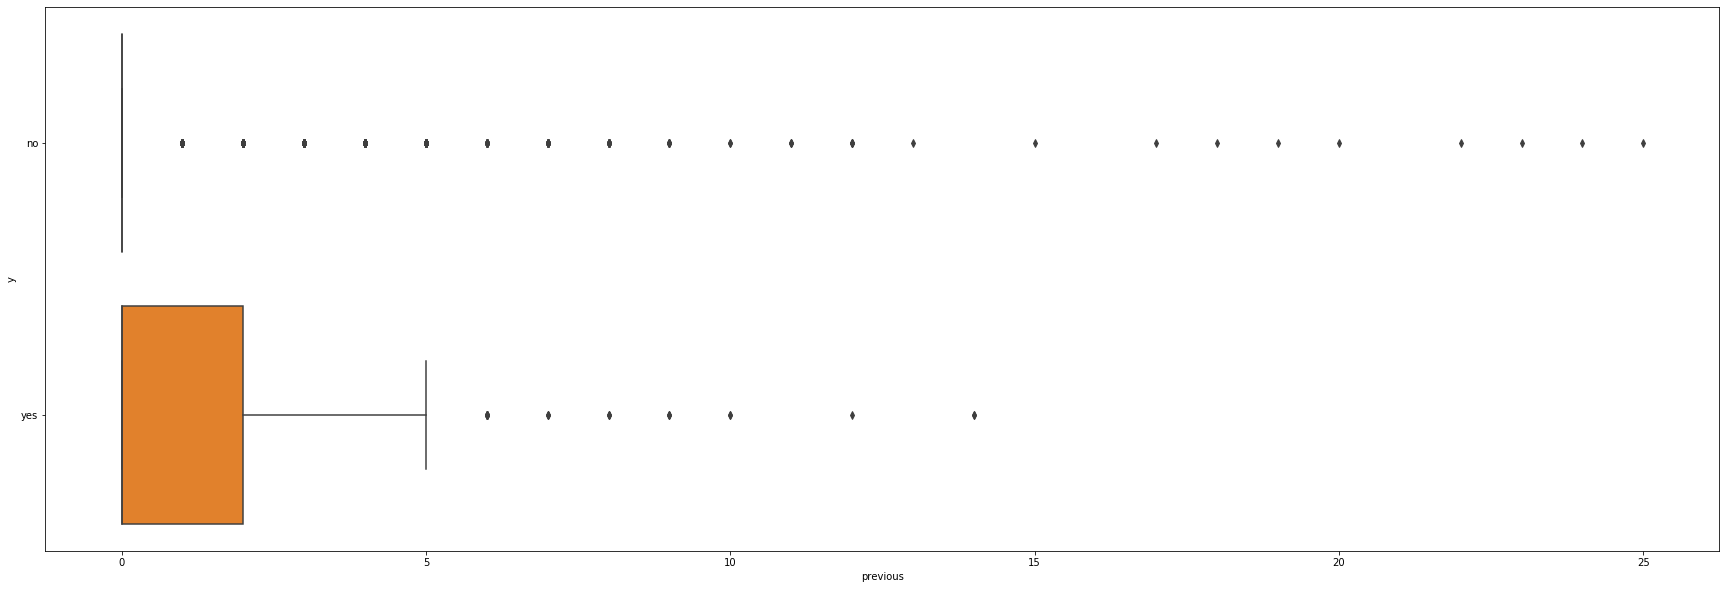

In [334]:
plt.figure(figsize=(30,10))
sns.boxplot(x='previous',y='y',data=df)

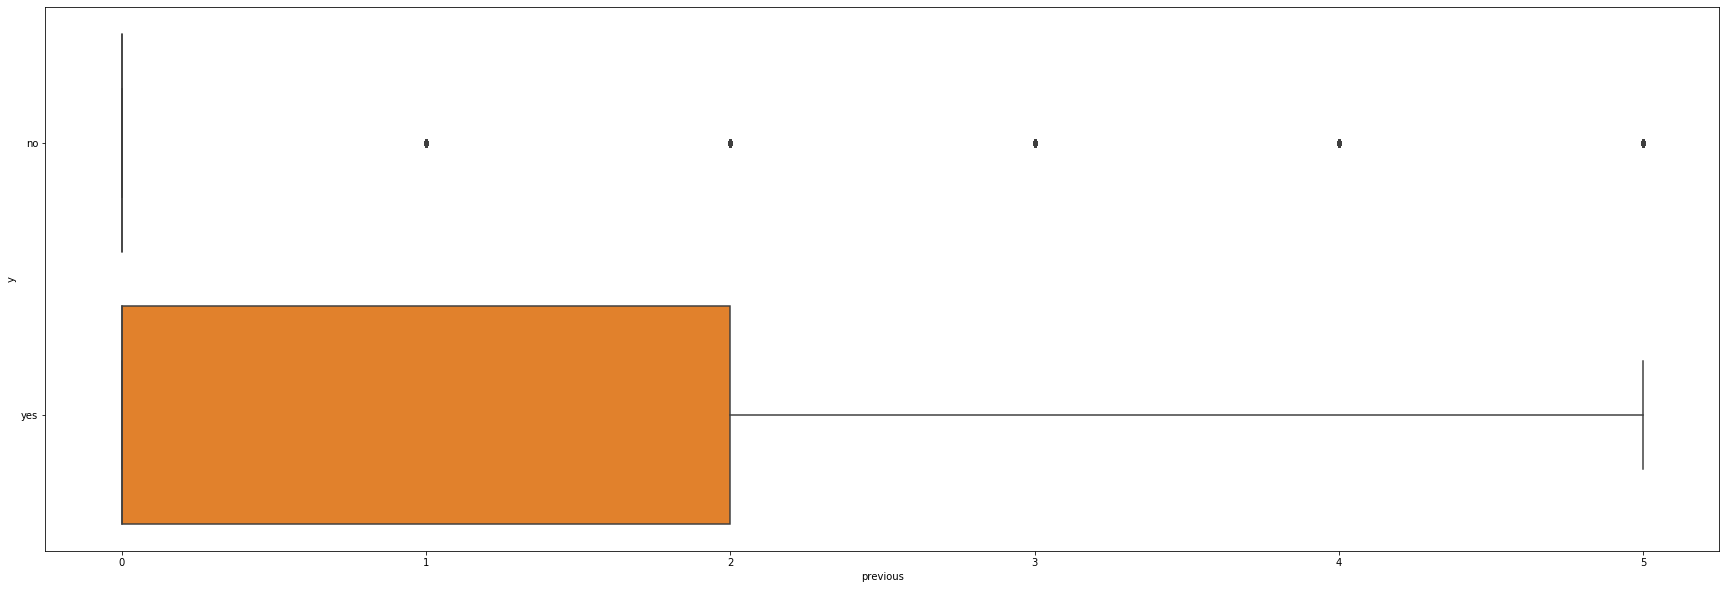

In [336]:
df.loc[(df.previous>5),'previous']=5

plt.figure(figsize=(30,10))
sns.boxplot(x='previous',y='y',data=df)

In [343]:
df['campaign']=df['campaign'].astype('str')
df['previous']=df['previous'].astype('str')

df['day']=df['day'].astype('str')

In [344]:
df['Actual_Date']=df['month'] + df['day']

In [345]:
df_cat=df[['job','marital','education','default','housing','loan','contact','day','month','poutcome','Actual_Date','p_day_Group','campaign','previous']] #Discreate Dataset
df_int=df[['age','balance','duration']] # Numerical Dataset

In [346]:
#Convert categorical variable into dummy/indicator variables.
df_cat1=pd.get_dummies(df_cat)

In [347]:
df_int.describe()

,age,balance,duration
count,4521.000000,4521.000000,4521.000000
mean,41.151736,734.219642,261.843397
std,10.508929,802.356769,246.713601
min,19.000000,-2000.000000,4.000000
25%,33.000000,69.000000,104.000000
50%,39.000000,444.000000,185.000000
75%,49.000000,1480.000000,329.000000
max,77.000000,2000.000000,1450.000000


In [354]:
#Scale numerical data between 0 and 1
scaler = MinMaxScaler()
df_int2=pd.DataFrame(scaler.fit_transform(df_int))
df_int2.columns= ['age','balance','duration']

In [468]:
X0=pd.concat((df_int2,df_cat1),axis=1)
y0=pd.DataFrame(df.loc[:,'y'])
y0['y']=y0['y'].apply(lambda x: 0 if x=='no' else 1)

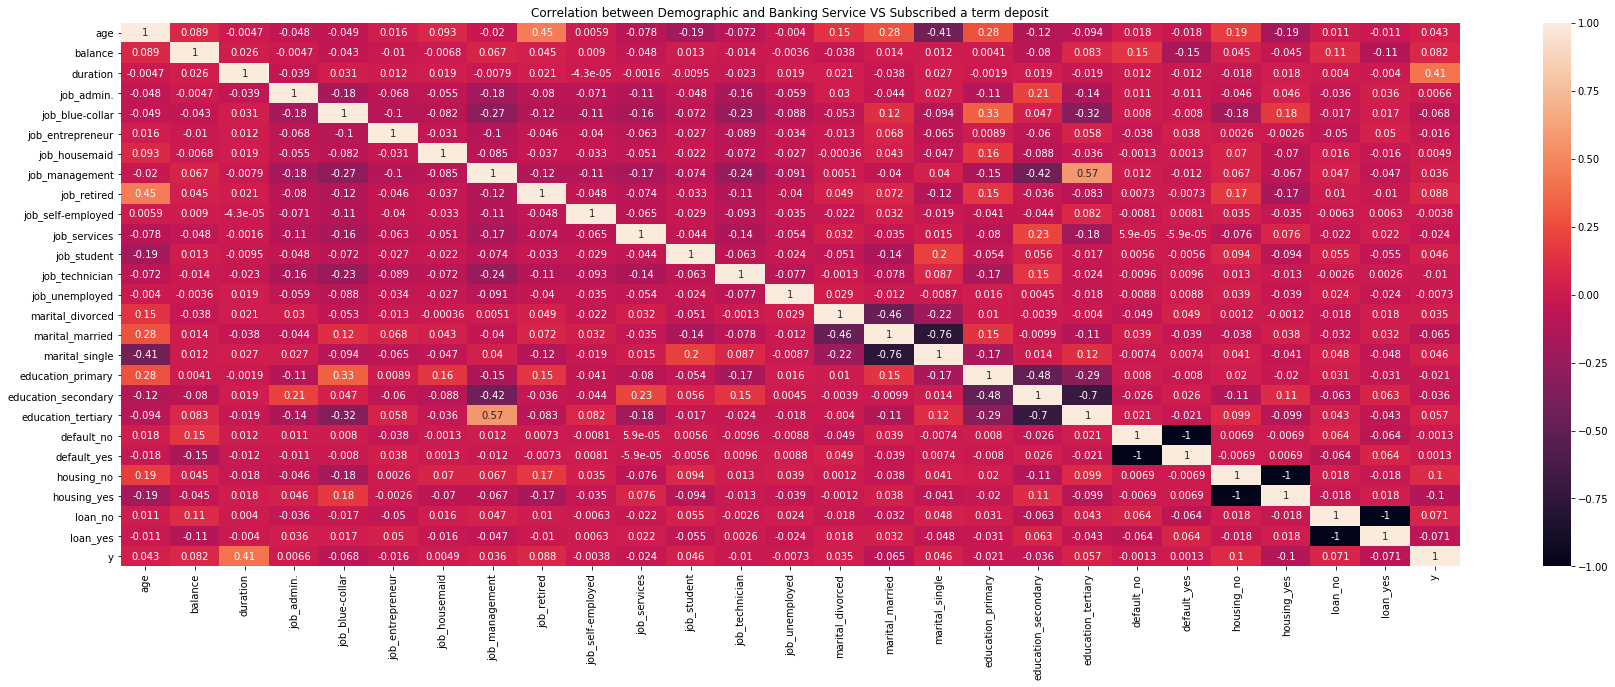

In [521]:
plt.figure(figsize=(30,10))
plt.title('Correlation between Demographic and Banking Service VS Subscribed a term deposit')
Corr=pd.concat((X0[['age', 'balance', 'duration', 
 'job_admin.', 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management','job_retired', 
 'job_self-employed', 'job_services','job_student','job_technician', 'job_unemployed', 'marital_divorced',
 'marital_married', 'marital_single', 
 'education_primary','education_secondary', 'education_tertiary', 
 'default_no','default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes']],y0),axis=1)
sns.heatmap(Corr.corr(),vmin=-1,vmax=1,annot=True)

#### Here, we can see that Duration is positive relation to Term Deposit Subscription. 

In [469]:
# Oversample data due to imbalance data
from imblearn.over_sampling import SMOTE
smk = SMOTE()
X,y=smk.fit_sample(X0,y0)

# Train Model

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [490]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(5600, 347) (5600, 1) (2400, 347) (2400, 1)


In [500]:
##Prepare list to store Score
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [501]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=1000).fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.94125 0.923785594639866 0.9566348655680833 0.93992330634853


### Support Vector Classifer SVC

In [502]:
from sklearn.svm import SVC
clf = SVC(random_state=42).fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.9383333333333334 0.8886097152428811 0.9860594795539034 0.9348017621145376


In [503]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.7995833333333333 0.9882747068676717 0.7164541590771099 0.83069341781063


### Random Forest

In [504]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42).fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)
print(clf.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.95625 0.9731993299832495 0.9408906882591093 0.956772334293948


### XGBoosing

In [505]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':5, 'eta':0.7, 'objective':'binary:hinge' }
num_round = 35
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
print(clf.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.95625 0.940536013400335 0.9182338511856092 0.9292511377741001


# Model Evaluation

In [506]:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),
                      columns=['Logistic Regression',
                               'SVC',
                               'KNN',
                               'Random Forest',
                               'XGB'],index=ind_name)
summary

,Logistic Regression,SVC,KNN,Random Forest,XGB
Accuracy_Score,0.941250,0.938333,0.799583,0.956250,0.928750
Recall_Score,0.923786,0.888610,0.988275,0.973199,0.940536
Precision_Score,0.956635,0.986059,0.716454,0.940891,0.918234
F1_Score,0.939923,0.934802,0.830693,0.956772,0.929251


#### From the above result, the Accuracy Score of Random Forest is the highest, while KNN is the lowest.
#### However, in this case, as the classification goal is to predict if the client will subscribe to a term deposit, so that we can save cost for Marketing.
#### We should much concern on Precision Score. 
#### Precision Score in this case means finding True Posive based on (True Postive and Negative Postive), 
#### i.e. The rate of finding customer who will subscribed under our predict subscried customer.
#### Therefore we should choose the model with higher Precision Score, i.e. SVC, with 98.6%